In [2]:
#importing the necessary libraries
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box,shape,Point,LineString,Polygon
import pandas as pd
from fiona import open
from fastkml import kml
import xml.etree.ElementTree as ET

def kml_to_gdf(kml_file):
    with open(kml_file, 'r', encoding='utf-8') as f:
        doc = f.read().encode('utf-8')
        
    k = kml.KML()
    k.from_string(doc)
    
    document = list(k.features())[0]
    
    # Extracting the first folder
    folder = list(document.features())[0]
    
    placemarks = []
    
    for feature in folder.features():
        for subfeature in feature.features():
            placemarks.append({
                'name': subfeature.name,
                'description': subfeature.description,
                'geometry': shape(subfeature.geometry)
            })
    
    gdf = gpd.GeoDataFrame(placemarks)
    return gdf

In [10]:
def parse_kml_coordinates(coord_text):
    coords = []
    for coord in coord_text.strip().split():
        lon, lat, _ = map(float, coord.split(','))
        coords.append((lon, lat))
    return coords

def kml_to_gdf(kml_file):
    tree = ET.parse(kml_file)
    root = tree.getroot()

    namespace = {'kml': 'http://www.opengis.net/kml/2.2'}

    placemarks = []

    for placemark in root.findall('.//kml:Placemark', namespace):
        name = placemark.find('kml:name', namespace).text if placemark.find('kml:name', namespace) is not None else None
        description = placemark.find('kml:description', namespace).text if placemark.find('kml:description', namespace) is not None else None
        geometry = None

        if placemark.find('.//kml:Point/kml:coordinates', namespace) is not None:
            coords = placemark.find('.//kml:Point/kml:coordinates', namespace).text
            geometry = Point(parse_kml_coordinates(coords)[0])
        elif placemark.find('.//kml:LineString/kml:coordinates', namespace) is not None:
            coords = placemark.find('.//kml:LineString/kml:coordinates', namespace).text
            geometry = LineString(parse_kml_coordinates(coords))
        elif placemark.find('.//kml:Polygon/kml:coordinates', namespace) is not None:
            coords = placemark.find('.//kml:Polygon/kml:coordinates', namespace).text
            geometry = Polygon(parse_kml_coordinates(coords))

        if geometry is not None:
            placemarks.append({
                'name': name,
                'description': description,
                'geometry': geometry
            })
        print(f"Number of placemarks processed: {len(placemarks)}")
    gdf = gpd.GeoDataFrame(placemarks)
    return gdf

In [11]:
gdf = kml_to_gdf(r'C:\Users\Ankit\Documents\Vedanshi\ML-hands-on\course_work\crown\data\crown.kml')
gdf

Number of placemarks processed: 0


""


In [12]:
def print_kml_structure(element, indent=''):
    print(f"{indent}{element.tag}")
    for child in element:
        print_kml_structure(child, indent + '  ')

tree = ET.parse(r'C:\Users\Ankit\Documents\Vedanshi\ML-hands-on\course_work\crown\data\crown.kml')
root = tree.getroot()
print_kml_structure(root)

{http://www.opengis.net/kml/2.2}kml
  {http://www.opengis.net/kml/2.2}Document
    {http://www.opengis.net/kml/2.2}name
    {http://www.google.com/kml/ext/2.2}CascadingStyle
      {http://www.opengis.net/kml/2.2}Style
        {http://www.opengis.net/kml/2.2}IconStyle
          {http://www.opengis.net/kml/2.2}scale
          {http://www.opengis.net/kml/2.2}Icon
            {http://www.opengis.net/kml/2.2}href
          {http://www.opengis.net/kml/2.2}hotSpot
        {http://www.opengis.net/kml/2.2}LabelStyle
        {http://www.opengis.net/kml/2.2}LineStyle
          {http://www.opengis.net/kml/2.2}color
          {http://www.opengis.net/kml/2.2}width
        {http://www.opengis.net/kml/2.2}PolyStyle
          {http://www.opengis.net/kml/2.2}color
        {http://www.opengis.net/kml/2.2}BalloonStyle
    {http://www.google.com/kml/ext/2.2}CascadingStyle
      {http://www.opengis.net/kml/2.2}Style
        {http://www.opengis.net/kml/2.2}IconStyle
          {http://www.opengis.net/kml/2.2}

# failed reading the kml

## plotting the points of the map 

C:\Users\Ankit\AppData\Local\Temp\ipykernel_15968\1278328163.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


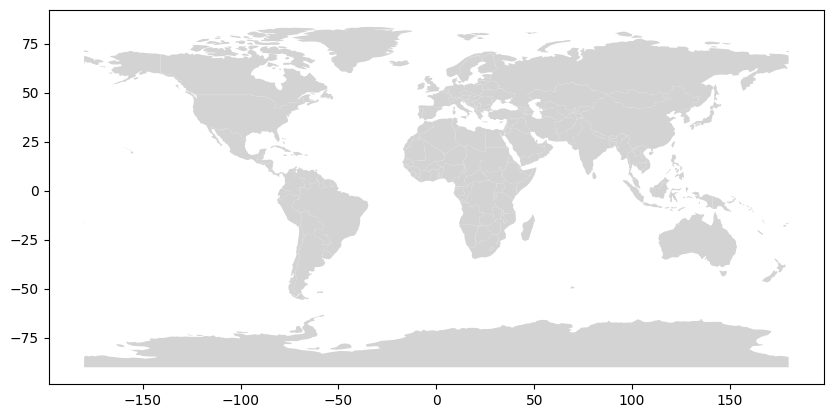

In [4]:

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map with the points
fig, ax = plt.subplots(figsize=(10, 10))
world.plot(ax=ax, color='lightgray')

plt.show()

In [11]:

# Select a specific country
country = world[world.name == "India"]
gdf = gdf.set_geometry('geometry')

points_in_india
# Perform a spatial join to find points within the country, this spatial join is quite useful will discuss in upcoming classes
points_in_india = gpd.sjoin(gdf, country, how="inner", op='within')

points_in_india

ValueError: Unknown column geometry

C:\Users\Ankit\AppData\Local\Temp\ipykernel_15968\3875259888.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


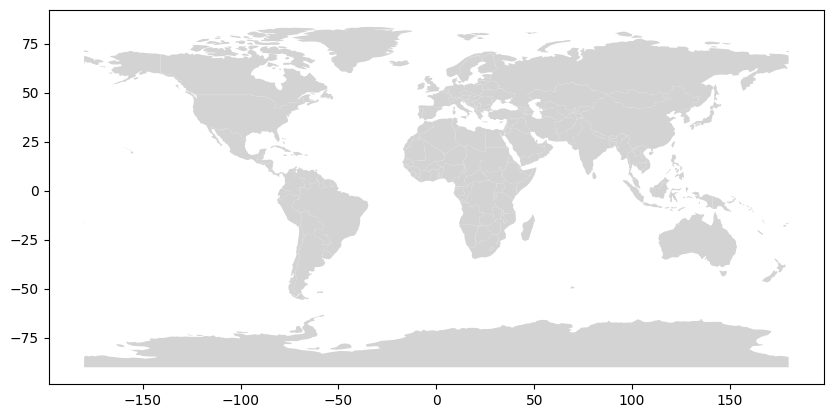

                    geometry  index_right       pop_est continent   name  \
0  POINT (78.96290 20.59370)           98  1.366418e+09      Asia  India   
1  POINT (80.96290 21.59370)           98  1.366418e+09      Asia  India   
2  POINT (81.00000 22.00000)           98  1.366418e+09      Asia  India   

  iso_a3  gdp_md_est  
0    IND     2868929  
1    IND     2868929  
2    IND     2868929  


C:\Users\Ankit\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\Ankit\AppData\Local\Temp\ipykernel_15968\3875259888.py:27: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  points_in_india = gpd.sjoin(gdf, country, how="inner", op='within')


In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map with the points
fig, ax = plt.subplots(figsize=(10, 10))
world.plot(ax=ax, color='lightgray')
plt.show()

# Define the gdf with some example points (you should replace this with your actual data)
# Example: creating some points within the bounding box of India
from shapely.geometry import Point

points = [
    Point(78.9629, 20.5937),  # This is within India's bounding box
    Point(80.9629, 21.5937),  # This is within India's bounding box
    Point(81.0, 22.0)  # This is within India's bounding box
]
gdf = gpd.GeoDataFrame(geometry=points)

# Select a specific country
country = world[world.name == "India"]

# Perform a spatial join to find points within the country
points_in_india = gpd.sjoin(gdf, country, how="inner", op='within')

# Display the resulting points
print(points_in_india)


C:\Users\Ankit\AppData\Local\Temp\ipykernel_15968\385260925.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


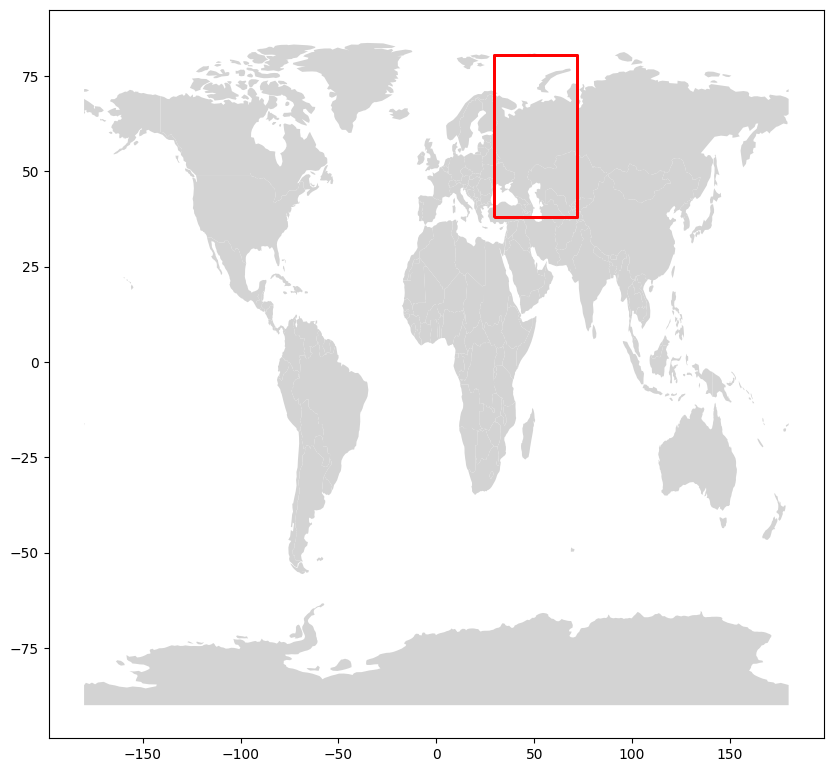

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Load the world map dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Define the coordinates for the rectangle
minx, miny, maxx, maxy = 29.375, 37.875, 71.875, 80.375

# Create a Polygon representing the region
region = Polygon([(minx, miny), (minx, maxy), (maxx, maxy), (maxx, miny), (minx, miny)])

# Create a GeoDataFrame with the region
region_gdf = gpd.GeoDataFrame(geometry=[region], crs=world.crs)

# Plot the world map with the region highlighted
fig, ax = plt.subplots(figsize=(10, 10))
world.plot(ax=ax, color='lightgray')

# Plot the region with a boundary
region_gdf.boundary.plot(ax=ax, color='red', linewidth=2)

# Optionally, fill the region with a transparent color
region_gdf.plot(ax=ax, color='none', edgecolor='red', linewidth=2)

plt.show()


In [21]:
def is_square(coordinates):
    # Ensure the coordinates form a closed loop (polygon)
    if coordinates[0] != coordinates[-1]:
        return False
    
    # Check if there are exactly 5 points (including the repeated first point)
    if len(coordinates) != 5:
        return False
    
    # Calculate the lengths of the sides
    side_lengths = []
    for i in range(4):
        x1, y1 = coordinates[i]
        x2, y2 = coordinates[i + 1]
        side_length = ((x2 - x1)**2 + (y2 - y1)**2)**0.5
        side_lengths.append(side_length)
    
    # Check if all sides have equal length (allowing for some tolerance due to float precision)
    tolerance = 1e-6
    if not all(abs(side_lengths[0] - side_length) < tolerance for side_length in side_lengths):
        return False
    
    # Check if opposite sides are parallel (same slope)
    slopes = []
    for i in range(4):
        x1, y1 = coordinates[i]
        x2, y2 = coordinates[i + 1]
        if x2 - x1 == 0:
            slope = float('inf')  # Vertical line, infinite slope
        else:
            slope = (y2 - y1) / (x2 - x1)
        slopes.append(slope)
    
    # Check if opposite sides have equal slopes (allowing for some tolerance)
    if not (abs(slopes[0] - slopes[2]) < tolerance and abs(slopes[1] - slopes[3]) < tolerance):
        return False
    
    # Check if all angles are right angles (dot product of adjacent sides is zero)
    right_angle_tolerance = 1e-6
    for i in range(4):
        x1, y1 = coordinates[i]
        x2, y2 = coordinates[i + 1]
        if i < 3:
            x3, y3 = coordinates[i + 2]
        else:
            x3, y3 = coordinates[0]
        
        # Vector directions
        vec1 = (x2 - x1, y2 - y1)
        vec2 = (x3 - x2, y3 - y2)
        
        # Dot product
        dot_product = vec1[0] * vec2[0] + vec1[1] * vec2[1]
        
        # Check if dot product is close to zero (indicating a right angle)
        if abs(dot_product) > right_angle_tolerance:
            return False
    
    return True

# Example usage:
coordinates = [
    [72,37.25],
    [72,32],
    [81,32],
    [81,37.25],
    [72,37.25]  # Closing the loop
]

print(is_square(coordinates))  # Output: True


False


In [22]:
def find_square_coordinates(coordinates):
    if len(coordinates) != 5 or coordinates[0] != coordinates[-1]:
        raise ValueError("Coordinates must form a closed loop with exactly 5 points.")
    
    x_coords = [point[0] for point in coordinates[:-1]]
    y_coords = [point[1] for point in coordinates[:-1]]
    
    # Calculate the center of the quadrilateral
    center_x = sum(x_coords) / 4
    center_y = sum(y_coords) / 4
    
    # Calculate the distance from the center to each vertex
    distances = []
    for x, y in coordinates[:-1]:
        distance = ((x - center_x) ** 2 + (y - center_y) ** 2) ** 0.5
        distances.append(distance)
    
    # Check if all sides are approximately equal
    tolerance = 1e-6
    if not all(abs(distances[0] - dist) < tolerance for dist in distances):
        print("Distances from center:", distances)
        raise ValueError("Coordinates do not form a square (unequal distances from center).")
    
    # Check if opposite sides are approximately equal
    side1 = ((coordinates[1][0] - coordinates[0][0]) ** 2 + (coordinates[1][1] - coordinates[0][1]) ** 2) ** 0.5
    side2 = ((coordinates[2][0] - coordinates[1][0]) ** 2 + (coordinates[2][1] - coordinates[1][1]) ** 2) ** 0.5
    side3 = ((coordinates[3][0] - coordinates[2][0]) ** 2 + (coordinates[3][1] - coordinates[2][1]) ** 2) ** 0.5
    side4 = ((coordinates[0][0] - coordinates[3][0]) ** 2 + (coordinates[0][1] - coordinates[3][1]) ** 2) ** 0.5
    
    if abs(side1 - side3) > tolerance or abs(side2 - side4) > tolerance:
        print("Side lengths:", side1, side2, side3, side4)
        raise ValueError("Coordinates do not form a square (opposite sides not equal).")
    
    # Check if diagonals are approximately equal
    diagonal1 = ((coordinates[2][0] - coordinates[0][0]) ** 2 + (coordinates[2][1] - coordinates[0][1]) ** 2) ** 0.5
    diagonal2 = ((coordinates[3][0] - coordinates[1][0]) ** 2 + (coordinates[3][1] - coordinates[1][1]) ** 2) ** 0.5
    
    if abs(diagonal1 - diagonal2) > tolerance:
        print("Diagonal lengths:", diagonal1, diagonal2)
        raise ValueError("Coordinates do not form a square (diagonals not equal).")
    
    return coordinates

# Example usage:
coordinates = [
    [72,37.25],
    [72,32],
    [81,32],
    [81,37.25],
    [72,37.25]  # Closing the loop
]

try:
    square_coordinates = find_square_coordinates(coordinates)
    print("Coordinates forming a square:")
    for coord in square_coordinates:
        print(coord)
except ValueError as e:
    print(f"Error: {e}")

Coordinates forming a square:
[72, 37.25]
[72, 32]
[81, 32]
[81, 37.25]
[72, 37.25]


In [23]:
def correct_square_coordinates(coordinates):
    if len(coordinates) != 5 or coordinates[0] != coordinates[-1]:
        raise ValueError("Coordinates must form a closed loop with exactly 5 points.")
    
    x_coords = [point[0] for point in coordinates[:-1]]
    y_coords = [point[1] for point in coordinates[:-1]]
    
    # Calculate the center of the quadrilateral
    center_x = sum(x_coords) / 4
    center_y = sum(y_coords) / 4
    
    # Calculate the distance from the center to each vertex
    distances = []
    for x, y in coordinates[:-1]:
        distance = ((x - center_x) ** 2 + (y - center_y) ** 2) ** 0.5
        distances.append(distance)
    
    # Calculate the average distance
    avg_distance = sum(distances) / len(distances)
    
    # Adjust the coordinates to form a square
    corrected_coordinates = []
    for i, (x, y) in enumerate(coordinates[:-1]):
        angle = math.atan2(y - center_y, x - center_x)
        new_x = center_x + avg_distance * math.cos(angle)
        new_y = center_y + avg_distance * math.sin(angle)
        corrected_coordinates.append([new_x, new_y])
    
    # Add the closing point
    corrected_coordinates.append(corrected_coordinates[0])
    
    return corrected_coordinates

# Example usage:
import math

coordinates = [
    [72,37.25],
    [72,32],
    [81,32],
    [81,37.25],
    [72,37.25]  # Closing the loop
]

try:
    square_coordinates = correct_square_coordinates(coordinates)
    print("Corrected coordinates forming a square:")
    for coord in square_coordinates:
        print(f"[{coord[0]:.6f}, {coord[1]:.6f}]")
except ValueError as e:
    print(f"Error: {e}")

Corrected coordinates forming a square:
[72.000000, 37.250000]
[72.000000, 32.000000]
[81.000000, 32.000000]
[81.000000, 37.250000]
[72.000000, 37.250000]
